In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        #print(os.path.join(dirname, filename))"

In [5]:
#generators
train_ds=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
    image=tf.cast(image/255. , tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
#create cnn

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
3125/3125 [==============================] - 327s 98ms/step - loss: 0.3514 - accuracy: 0.8362 - val_loss: 0.2364 - val_accuracy: 0.9067
Epoch 2/10
3125/3125 [==============================] - 215s 69ms/step - loss: 0.1203 - accuracy: 0.9538 - val_loss: 1.1180 - val_accuracy: 0.6115
Epoch 3/10
3125/3125 [==============================] - 214s 68ms/step - loss: 0.0599 - accuracy: 0.9784 - val_loss: 1.2762 - val_accuracy: 0.6593
Epoch 4/10
3125/3125 [==============================] - 215s 69ms/step - loss: 0.0395 - accuracy: 0.9859 - val_loss: 0.9694 - val_accuracy: 0.5367
Epoch 5/10
3125/3125 [==============================] - 217s 69ms/step - loss: 0.0304 - accuracy: 0.9890 - val_loss: 0.3632 - val_accuracy: 0.9040
Epoch 6/10
3125/3125 [==============================] - 214s 69ms/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 32.6263 - val_accuracy: 0.5000
Epoch 7/10
3125/3125 [==============================] - 219s 70ms/step - loss: 0.0196 - accuracy: 0.9930 - val_loss: 

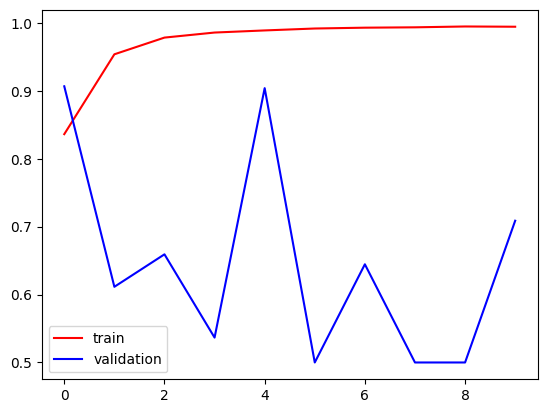

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

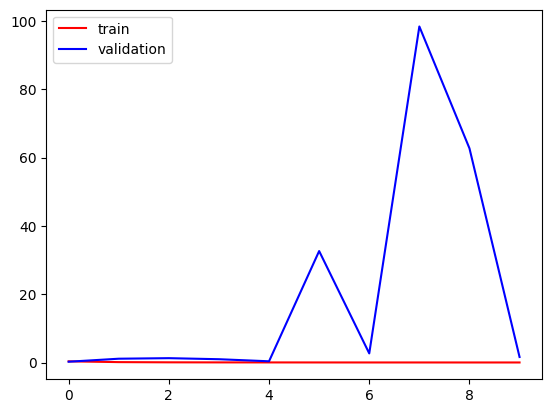

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
#Prediction
import cv2

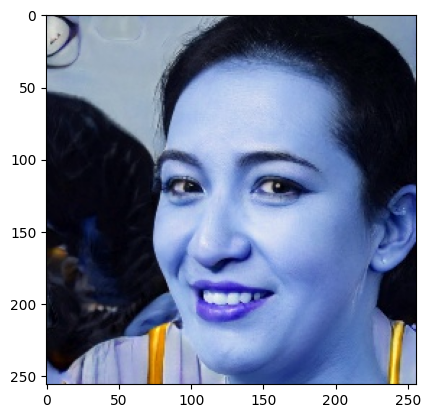

In [19]:
test_img=cv2.imread('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake/008Y48BIX8.jpg')
plt.imshow(test_img)

In [20]:
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)